<a href="https://colab.research.google.com/github/Sanjana-Sarma/NTTF_Training/blob/main/Excercise_11_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy 0.01:  1.0
Accuracy 0.1:  1.0
Accuracy 1:  1.0
Accuracy 10:  1.0
Accuracy 100:  1.0
Accuracy 1000:  1.0


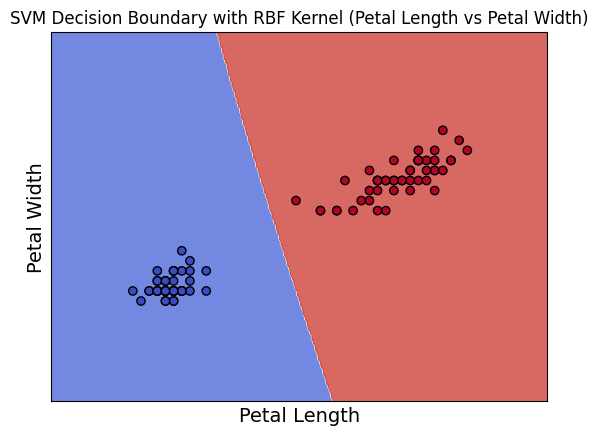

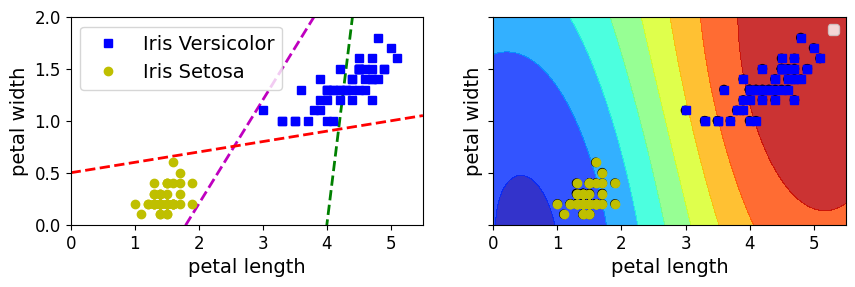

(-2.0, 2.0, -2.0, 2.0)

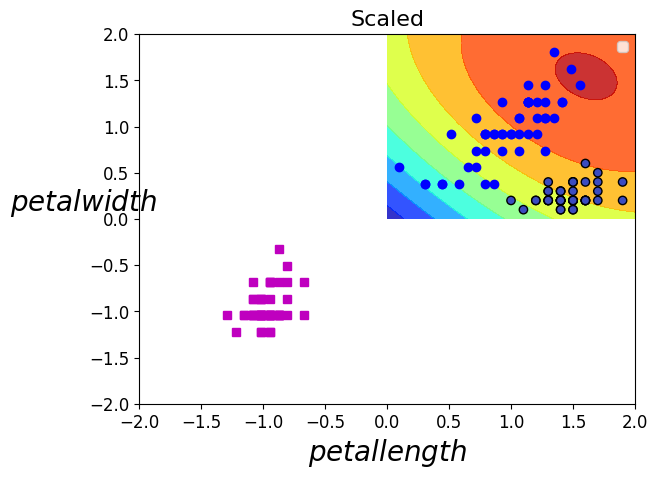

In [ ]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import pandas as pd
import os
np.random.seed(42)
# %matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

for i in range(-2, 4):
    val = 10**i
    svm_clf = SVC(kernel='rbf', C=val, gamma=val)
    svm_clf.fit(X, y)
    y_pred = svm_clf.predict(X)
    print("Accuracy {}: ".format(val), accuracy_score(y, y_pred))

svm_clf = SVC(kernel='rbf', C=float("0.1"), gamma=float("0.1"))
svm_clf.fit(X, y)

h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("SVM Decision Boundary with RBF Kernel (Petal Length vs Petal Width)")
plt.show()

x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary_rbf(svm_clf, xmin, xmax):
    XX, YY = np.meshgrid(np.linspace(xmin, xmax, 200), np.linspace(0, 2, 200))
    Z = svm_clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.contourf(XX, YY, Z, alpha=0.8, cmap=plt.cm.jet)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel("petal length", fontsize=14)
    plt.ylabel("petal width", fontsize=14)
    plt.legend(loc='upper right')
    plt.axis([0.0, 5.5, 0, 2])

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m--", linewidth=2)
plt.plot(x0, pred_3, "r--", linewidth=2)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs", label="Iris Versicolor")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo", label="Iris Setosa")
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0.0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary_rbf(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "bs")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "yo")
plt.xlabel("petal length")
plt.ylabel("petal width")
plt.axis([0, 5.5, 0, 2])

plt.show()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
svm_clf.fit(X_scaled, y)
plt.plot(X_scaled[:, 0][y == 1], X_scaled[:, 1][y == 1], "bo")
plt.plot(X_scaled[:, 0][y == 0], X_scaled[:, 1][y == 0], "ms")
plot_svc_decision_boundary_rbf(svm_clf, 0, 5.5)
plt.xlabel("$petal length$", fontsize=20)
plt.ylabel("$petal width$", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])



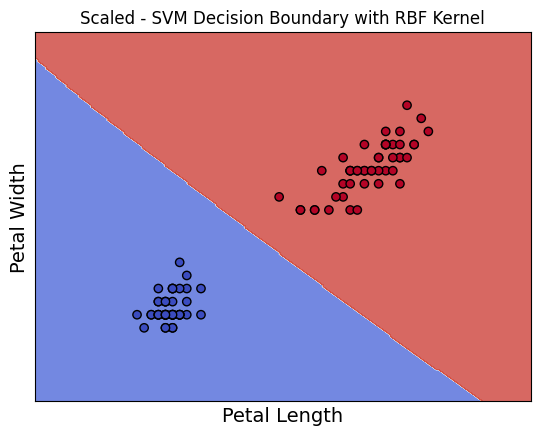

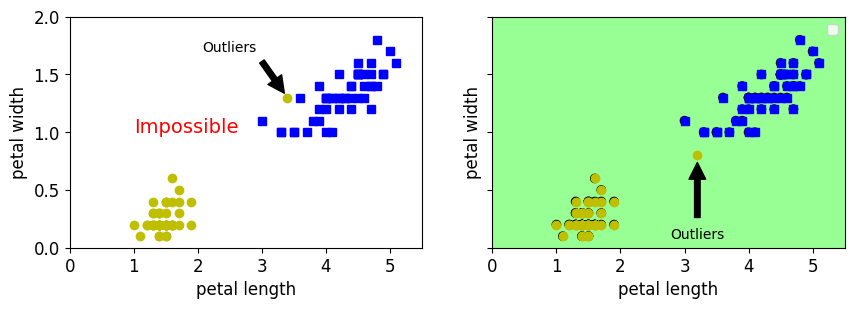

In [ ]:
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("Scaled - SVM Decision Boundary with RBF Kernel")
plt.show()

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="rbf", C=10**9, gamma=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10, 3), sharey=True)

plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1 == 1], Xo1[:, 1][yo1 == 1], "bs")
plt.plot(Xo1[:, 0][yo1 == 0], Xo1[:, 1][yo1 == 0], "yo")
plt.text(1.0, 1.0, "Impossible", fontsize=14, color="red")
plt.ylabel("petal width", fontsize=12)
plt.xlabel("petal length", fontsize=12)
plt.annotate("Outliers", xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=10,
             )

plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2 == 1], Xo2[:, 1][yo2 == 1], "bs")
plt.plot(Xo2[:, 0][yo2 == 0], Xo2[:, 1][yo2 == 0], "yo")
plot_svc_decision_boundary_rbf(svm_clf2, 0, 5.5)

plt.ylabel("petal width", fontsize=12)
plt.xlabel("petal length", fontsize=12)
plt.annotate("Outliers", xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=10,
             )

plt.axis([0, 5.5, 0, 2])
plt.show()


In [ ]:
bc = datasets.load_breast_cancer()
X=bc["data"]
y=bc["target"]

In [ ]:
malignant_or_benign = (y == 0) | (y == 1)
X = X[malignant_or_benign]
y = y[malignant_or_benign]
X = X[:, :2]

In [ ]:
for i in range(-2, 4):
    val = 10**i
    svm_clf = SVC(kernel='rbf', C=val, gamma=val)
    svm_clf.fit(X, y)
    y_pred = svm_clf.predict(X)
    print("Accuracy {}: ".format(val), accuracy_score(y, y_pred))

Accuracy 0.01:  0.7205623901581723
Accuracy 0.1:  0.9103690685413005
Accuracy 1:  0.9156414762741653
Accuracy 10:  0.9947275922671354
Accuracy 100:  1.0
Accuracy 1000:  1.0


In [ ]:
svm_clf = SVC(kernel='rbf', C=float("10"), gamma=float("1"))
svm_clf.fit(X, y)

SVC(C=10.0, gamma=1.0)

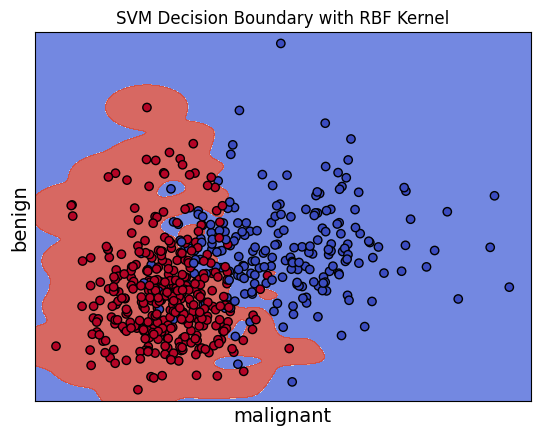

In [ ]:
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = svm_clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("malignant")
plt.ylabel("benign")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("SVM Decision Boundary with RBF Kernel")
plt.show()

In [ ]:
X_scaled=scaler.fit_transform(X)
clf_svm_scaled=SVC(kernel='rbf',C=float("10"),gamma=float("1"))
clf_svm_scaled.fit(X_scaled,y)
y_pred=clf_svm_scaled.predict(X_scaled)
print("Accuracy: ", accuracy_score(y,y_pred))

Accuracy:  0.9121265377855887


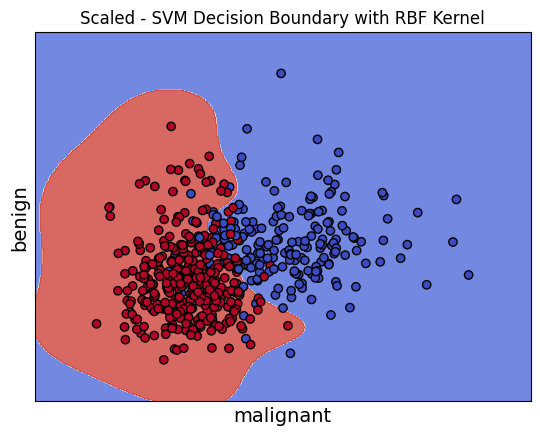

In [ ]:
h = 0.02
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf_svm_scaled.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("malignant")
plt.ylabel("benign")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("Scaled - SVM Decision Boundary with RBF Kernel")
plt.show()